### Nome: Andrey Nagatani  Prontuário:  bp3044505
### Curso: Análise e Desenvolvimento de Sistemas 
### Data Entrega: 31/05/2025 
### Período: Noturno 
### Disciplina: Fundamentos da Ciência de Dados 
### Trabalho T2 - Analise Exploratória com Statsmodel 

In [2]:
# instalar dependencias no ambiente virtual deste workspace\ usando amnbiente virtual do workspace em /.venv
%pip install pandas scikit-learn matplotlib seaborn statsmodels polar numpy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.8 MB/s eta 0:00:00
  Created wheel for polar: filename=polar-0.0.127-py3-none-any.whl size=10087 sha256=949ae8e35538607ea8026c02b3f17c146d3cbdf30b0c34a5bc7f251c2d3ef90e
  Stored in directory: /home/ina/.cache/pip/wheels/a4/65/44/458c86e158b734ab32f7cb346ddce2f2cd50542cf5c3cd0405
Successfully built polar
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [polar]m11/14 [imbalanced-learn]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import polar as pl
import numpy as np
import seaborn as sns
import pandas as pd
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)


# Analise exploratoria do dataset

Renomeando as colunas do Dataset e salvando em constantes para a utilização

In [3]:
c_sepala = 'comprimento da sépala (cm)'
l_sepala = 'largura da sépala (cm)'
c_petala = 'comprimento da pétala (cm)'
l_petala = 'largura da pétala (cm)'

iris.frame.rename(columns={
    'sepal length (cm)': c_sepala,
    'sepal width (cm)': l_sepala,
    'petal length (cm)': c_petala,
    'petal width (cm)': l_petala
}, inplace=True)

iris.frame.head()

,comprimento da sépala (cm),largura da sépala (cm),comprimento da pétala (cm),largura da pétala (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Cálculos Estatísticos

In [ ]:

def calcular_estatisticas(df: pl.DataFrame, coluna: None) -> None:

    media = df[coluna].mean()
    mediana = df[coluna].median()
    desvio_padrao = df[coluna].std()
    maximo = df[coluna].max()
    minimo = df[coluna].min()
    coeficiente_de_variacao = desvio_padrao / media *100
    
    print(f'Coluna: {coluna}')
    print(f'Média: {media}')
    print(f'Mediana: {mediana}')
    print(f'Desvio padrão: {desvio_padrao}')
    print(f'Máximo: {maximo}')
    print(f'Mínimo: {minimo}')
    print(f'Coeficiente de Variação: {coeficiente_de_variacao: .2f} %')
    print('------------------------')
    

def contar_valores_fora_limite(df: pl.DataFrame, coluna: str) -> tuple:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    
    limite_superior = media + 3 * desvio_padrao
    limite_inferior = media - 3 * desvio_padrao
    print(f'Limite superior {coluna}: {limite_superior}')
    print(f'Limite inferior {coluna}: {limite_inferior}')

    maximo = df[coluna].max()
    minimo = df[coluna].min()

    print(f'Máximo {coluna}: {maximo}')
    print(f'Mínimo {coluna}: {minimo}')
    
    valores_acima = df.filter(df[coluna] > limite_superior).shape[0]
    valores_abaixo = df.filter(df[coluna] < limite_inferior).shape[0]
    print(f'Valores acima do limite superior: {valores_acima}')
    print(f'Valores abaixo do limite inferior: {valores_abaixo}')
    print('----------------------------')


# Zscore = (Valor - Media) / Desvio Padrão
# O Zscore indica quantos desvios padrão um valor está acima ou abaixo da média.

def calcular_zscore(df: pl.DataFrame, coluna: str) -> pl.DataFrame:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    
    df_com_zscore = df.with_columns(
        ((df[coluna] - media) / desvio_padrao).alias(f'Zscore_{coluna}')
    )
    
    return df_com_zscore

Gráficos

In [ ]:
#Gráficos

def histograma(df: pd.DataFrame, coluna: str):
    # Plotando o histograma usando seaborn
    sns.histplot(x=df[coluna], color='blue')

def verificar_normalidade(df: pd.DataFrame, coluna: str):
    # Plotando o boxplot com a curva de densidade usando seaborn
    sns.boxplot(x=df[coluna], color='blue')

def verificar_linearidade(df: pd.DataFrame, coluna_x: str, coluna_y: str):
    # Plotando o gráfico de dispersão usando seaborn
    sns.scatterplot(x=df[coluna_x], y=df[coluna_y], color='green')


Análises Dataset

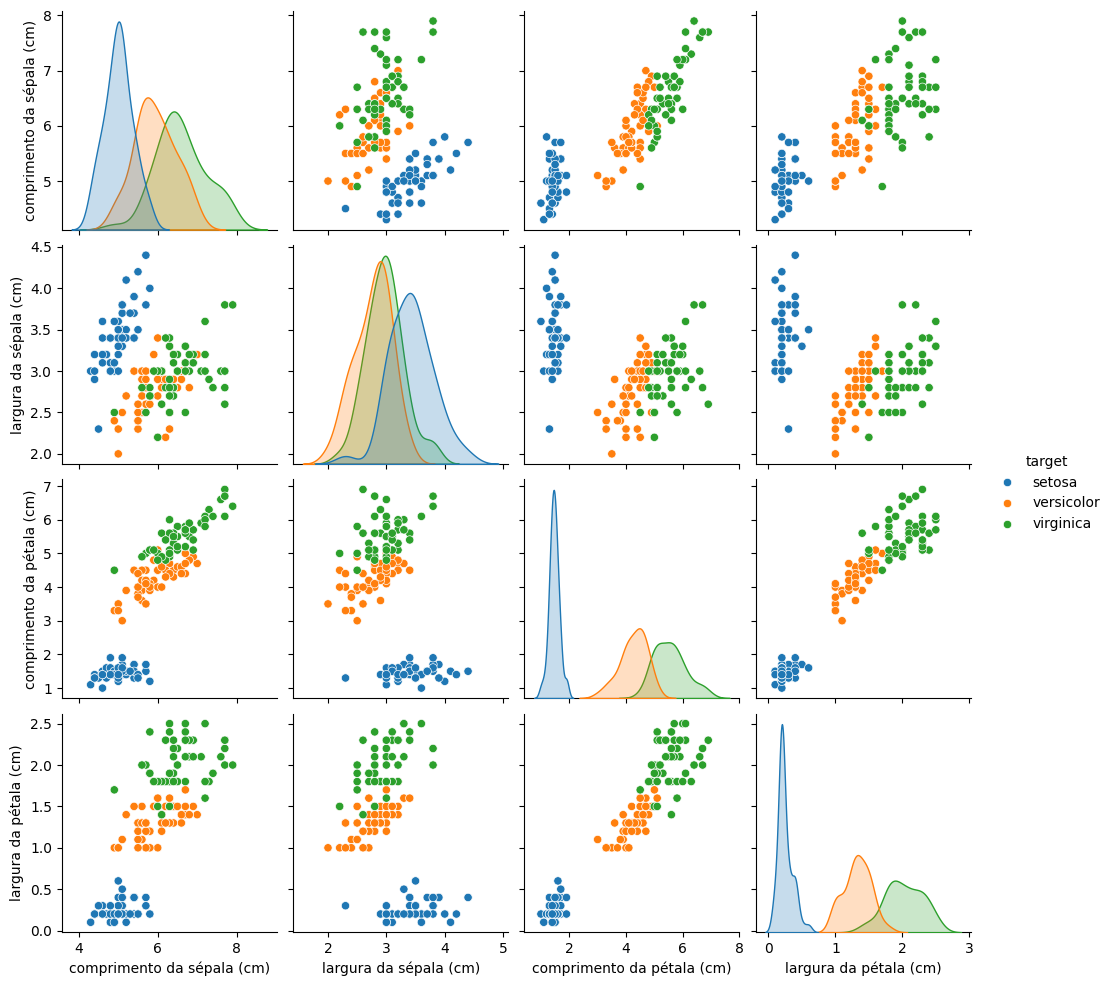

In [6]:
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

In [7]:
df = pl.from_pandas(iris.frame)

df.head

<bound method DataFrame.head of shape: (150, 5)
┌────────────────┬───────────────────┬────────────────────────┬────────────────────────┬───────────┐
│ comprimento da ┆ largura da sépala ┆ comprimento da pétala  ┆ largura da pétala (cm) ┆ target    │
│ sépala (cm)    ┆ (cm)              ┆ (cm)                   ┆ ---                    ┆ ---       │
│ ---            ┆ ---               ┆ ---                    ┆ f64                    ┆ str       │
│ f64            ┆ f64               ┆ f64                    ┆                        ┆           │
╞════════════════╪═══════════════════╪════════════════════════╪════════════════════════╪═══════════╡
│ 5.1            ┆ 3.5               ┆ 1.4                    ┆ 0.2                    ┆ setosa    │
│ 4.9            ┆ 3.0               ┆ 1.4                    ┆ 0.2                    ┆ setosa    │
│ 4.7            ┆ 3.2               ┆ 1.3                    ┆ 0.2                    ┆ setosa    │
│ 4.6            ┆ 3.1               ┆ 1.5 

In [8]:
calcular_estatisticas(df, c_sepala)
calcular_estatisticas(df, l_sepala)

Coluna: comprimento da sépala (cm)
Média: 5.843333333333334
Mediana: 5.8
Desvio padrão: 0.8280661279778629
Máximo: 7.9
Mínimo: 4.3
Coeficiente de Variação:  14.17 %
------------------------
Coluna: largura da sépala (cm)
Média: 3.0573333333333332
Mediana: 3.0
Desvio padrão: 0.4358662849366982
Máximo: 4.4
Mínimo: 2.0
Coeficiente de Variação:  14.26 %
------------------------


In [9]:
calcular_estatisticas(df, c_petala)
calcular_estatisticas(df, l_petala)

Coluna: comprimento da pétala (cm)
Média: 3.7579999999999996
Mediana: 4.35
Desvio padrão: 1.7652982332594664
Máximo: 6.9
Mínimo: 1.0
Coeficiente de Variação:  46.97 %
------------------------
Coluna: largura da pétala (cm)
Média: 1.1993333333333336
Mediana: 1.3
Desvio padrão: 0.7622376689603464
Máximo: 2.5
Mínimo: 0.1
Coeficiente de Variação:  63.56 %
------------------------


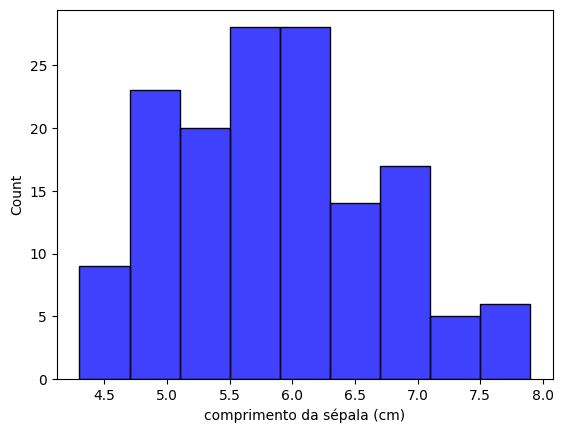

In [ ]:
histograma(iris.frame, c_sepala)

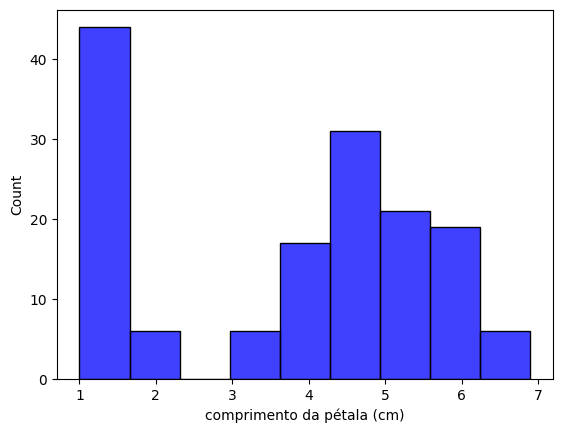

In [11]:
histograma(iris.frame, c_petala)

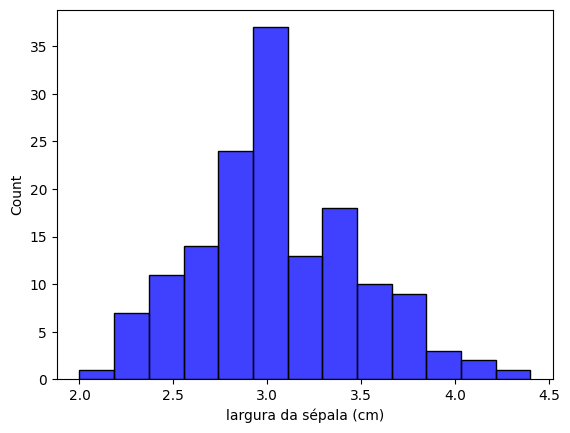

In [12]:
histograma(iris.frame, l_sepala)

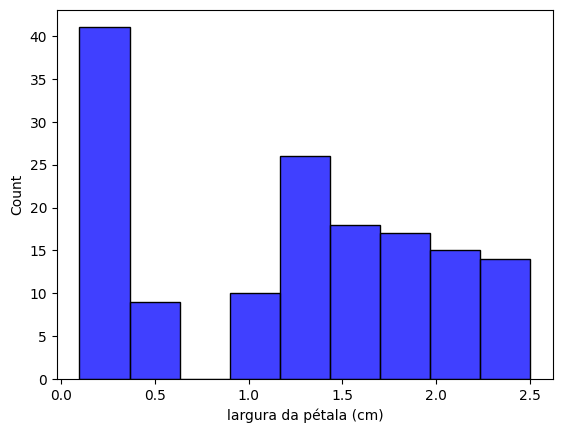

In [13]:
histograma(iris.frame, l_petala)

In [14]:
contar_valores_fora_limite(df, c_sepala)
contar_valores_fora_limite(df, l_sepala)
contar_valores_fora_limite(df, c_petala)
contar_valores_fora_limite(df, l_petala)

Limite superior comprimento da sépala (cm): 8.327531717266922
Limite inferior comprimento da sépala (cm): 3.3591349493997447
Máximo comprimento da sépala (cm): 7.9
Mínimo comprimento da sépala (cm): 4.3
Valores acima do limite superior: 0
Valores abaixo do limite inferior: 0
----------------------------
Limite superior largura da sépala (cm): 4.3649321881434275
Limite inferior largura da sépala (cm): 1.7497344785232385
Máximo largura da sépala (cm): 4.4
Mínimo largura da sépala (cm): 2.0
Valores acima do limite superior: 1
Valores abaixo do limite inferior: 0
----------------------------
Limite superior comprimento da pétala (cm): 9.053894699778398
Limite inferior comprimento da pétala (cm): -1.5378946997783998
Máximo comprimento da pétala (cm): 6.9
Mínimo comprimento da pétala (cm): 1.0
Valores acima do limite superior: 0
Valores abaixo do limite inferior: 0
----------------------------
Limite superior largura da pétala (cm): 3.4860463402143727
Limite inferior largura da pétala (cm): 

In [15]:
df_zscore = calcular_zscore(df, c_sepala)

In [16]:
outliers = df_zscore.filter((df_zscore['Zscore_comprimento da sépala (cm)'] > 3) | 
                            (df_zscore['Zscore_comprimento da sépala (cm)'] < -3))

outliers.head()

comprimento da sépala (cm),largura da sépala (cm),comprimento da pétala (cm),largura da pétala (cm),target,Zscore_comprimento da sépala (cm)
f64,f64,f64,f64,str,f64


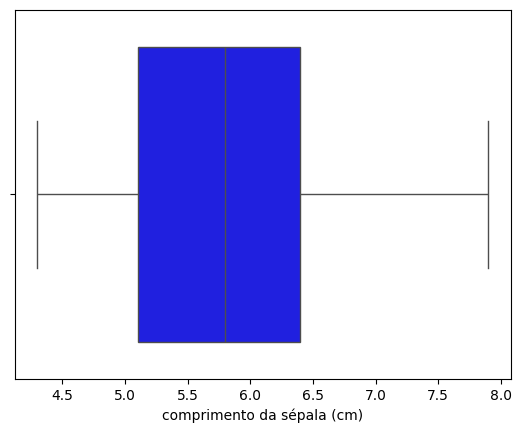

In [17]:
verificar_normalidade(iris.frame, c_sepala)

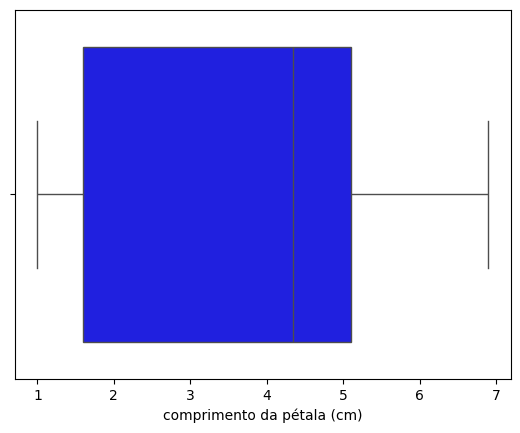

In [18]:
verificar_normalidade(iris.frame, c_petala)

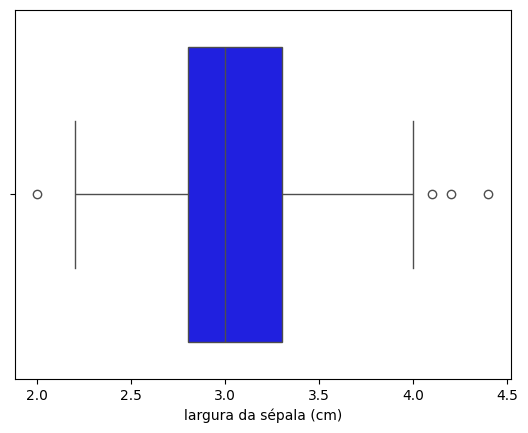

In [19]:
verificar_normalidade(iris.frame, l_sepala)

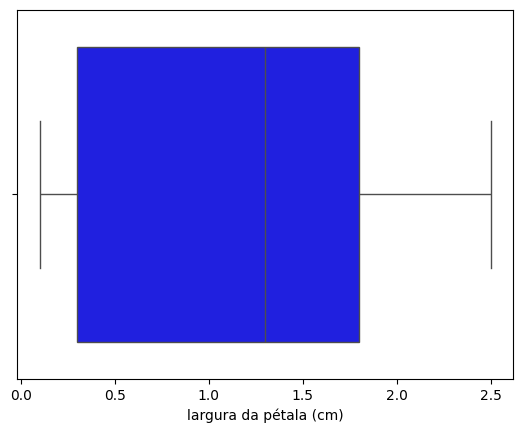

In [20]:
verificar_normalidade(iris.frame, l_petala)

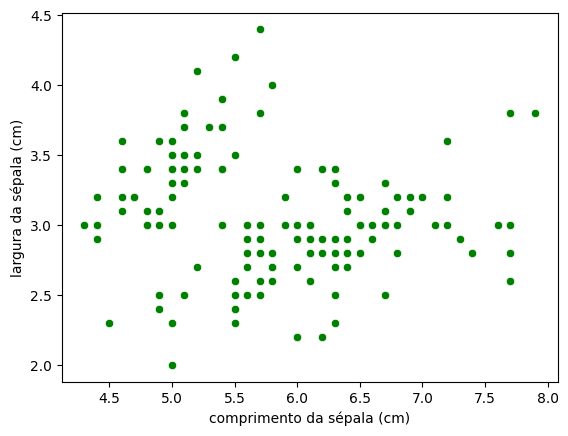

In [21]:
verificar_linearidade(iris.frame, c_sepala, l_sepala)

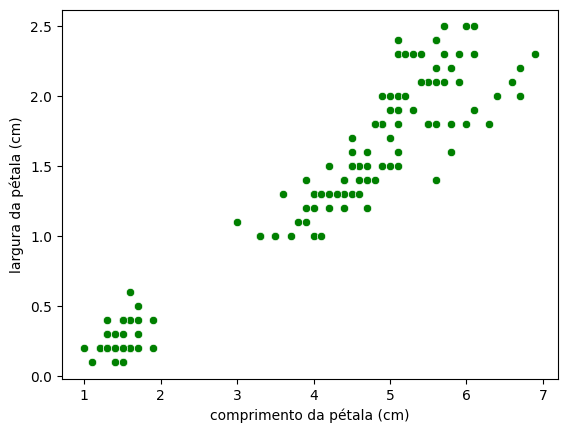

In [22]:
verificar_linearidade(iris.frame, c_petala, l_petala)

# Regressao Linear

In [6]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# Carregar os dados do Iris dataset
featuresAll=[]
features = iris.data[: , [0,1,2,3]]

In [9]:
# O código abaixo percorre cada observação do array features, soma os quatro valores de cada observação (características do iris) e adiciona o resultado como uma lista dentro da lista featuresAll. Ao final, imprime a lista featuresAll com as somas de cada linha.
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])
print(featuresAll)

[[np.float64(10.2)], [np.float64(9.5)], [np.float64(9.4)], [np.float64(9.399999999999999)], [np.float64(10.2)], [np.float64(11.4)], [np.float64(9.700000000000001)], [np.float64(10.1)], [np.float64(8.9)], [np.float64(9.6)], [np.float64(10.8)], [np.float64(9.999999999999998)], [np.float64(9.299999999999999)], [np.float64(8.5)], [np.float64(11.2)], [np.float64(12.000000000000002)], [np.float64(11.000000000000002)], [np.float64(10.3)], [np.float64(11.5)], [np.float64(10.7)], [np.float64(10.7)], [np.float64(10.700000000000001)], [np.float64(9.399999999999999)], [np.float64(10.599999999999998)], [np.float64(10.299999999999999)], [np.float64(9.799999999999999)], [np.float64(10.4)], [np.float64(10.399999999999999)], [np.float64(10.2)], [np.float64(9.7)], [np.float64(9.7)], [np.float64(10.700000000000001)], [np.float64(10.9)], [np.float64(11.299999999999999)], [np.float64(9.7)], [np.float64(9.599999999999998)], [np.float64(10.5)], [np.float64(10.0)], [np.float64(8.9)], [np.float64(10.2)], [np.f

In [10]:
# Encontrando a relação entre o comprimento da sépala e a largura da sépala
featuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[0]) #comprimento da sépala
    targets.append(feature[1]) #largura da sépala

XX = np.asarray(featuresAll)
X2 = XX[:, np.newaxis]
X2.shape

(150, 1)

In [11]:
y2 = iris.target
y2.shape

(150,)

In [12]:
model.fit(X2, y2)

LinearRegression()

In [13]:
# coeficientes do modelo
model.coef_

array([0.77421249])

In [14]:
# intercept
model.intercept_

np.float64(-3.5239816642469144)

In [15]:
Xfit = np.random.randint(8, size = (150))
Xfit.astype(float)
Xfit = Xfit[:, np.newaxis]
Xfit.shape

(150, 1)

In [16]:
yfit = model.predict(Xfit)
yfit.shape

(150,)

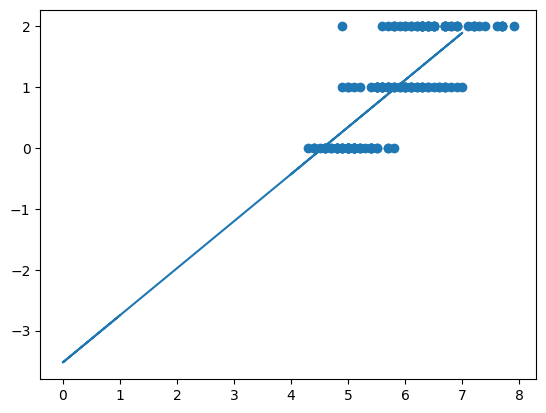

In [17]:
plt.scatter(X2, y2)
plt.plot(Xfit, yfit)

In [18]:
# Características Polinomiais

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(150, include_bias = False)
poly.fit_transform(X2)

array([[5.10000000e+000, 2.60100000e+001, 1.32651000e+002, ...,
        5.25274191e+104, 2.67889837e+105, 1.36623817e+106],
       [4.90000000e+000, 2.40100000e+001, 1.17649000e+002, ...,
        1.40935319e+102, 6.90583065e+102, 3.38385702e+103],
       [4.70000000e+000, 2.20900000e+001, 1.03823000e+002, ...,
        2.95449306e+099, 1.38861174e+100, 6.52647517e+100],
       ...,
       [6.50000000e+000, 4.22500000e+001, 2.74625000e+002, ...,
        2.04727783e+120, 1.33073059e+121, 8.64974883e+121],
       [6.20000000e+000, 3.84400000e+001, 2.38328000e+002, ...,
        1.87918720e+117, 1.16509606e+118, 7.22359560e+118],
       [5.90000000e+000, 3.48100000e+001, 2.05379000e+002, ...,
        1.21926392e+114, 7.19365714e+114, 4.24425771e+115]],
      shape=(150, 150))

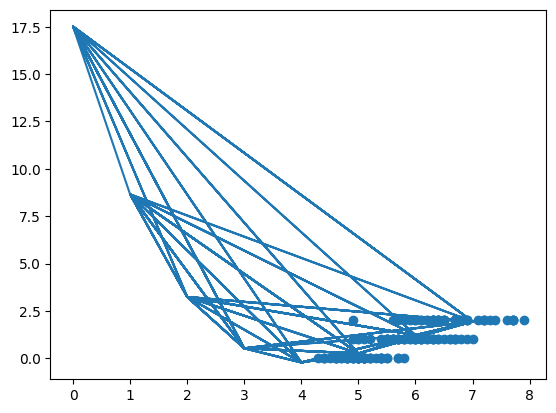

In [19]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X2, y2)
yfit = poly_model.predict(Xfit)

plt.scatter(X2, y2)
plt.plot(Xfit, yfit)

*CScatter Plot com o Conjunto de Dados Iris (Relação entre Comprimento e Largura da Sépala)**

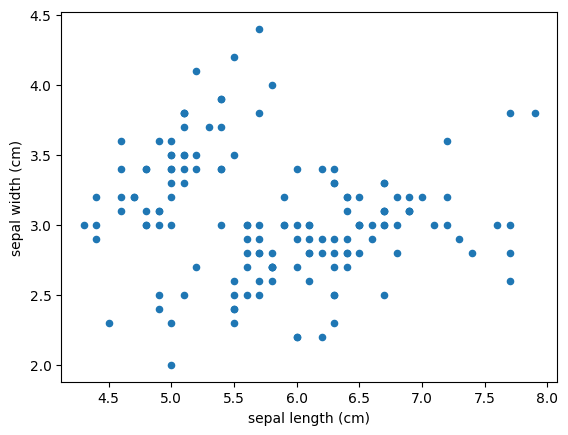

In [24]:
import pandas as pd

iris = load_iris()
iris = load_iris(as_frame=True)
df = iris.frame
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")
plt.show()

*Scatter Plot com o Conjunto de Dados Iris (Relação entre Comprimento e Largura da Pétala)**

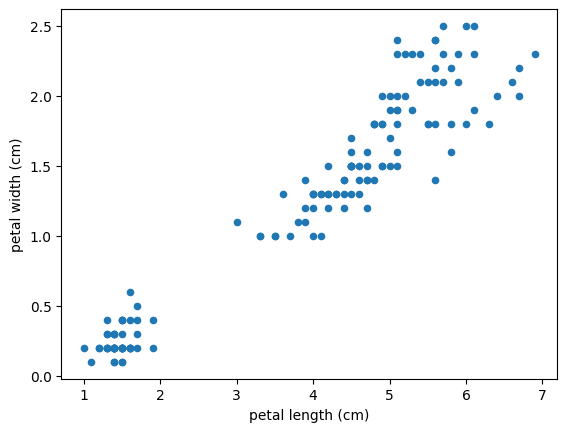

In [26]:
df.plot(kind="scatter", x="petal length (cm)", y="petal width (cm)")
plt.show()

*Violin Plot** 

Gráfico de violino mostrando a distribuição das medidas das sépalas e pétalas para cada espécie do conjunto de dados Iris. O gráfico de violino combina características do boxplot e do histograma, permitindo visualizar a densidade e a variação dos dados em cada grupo.

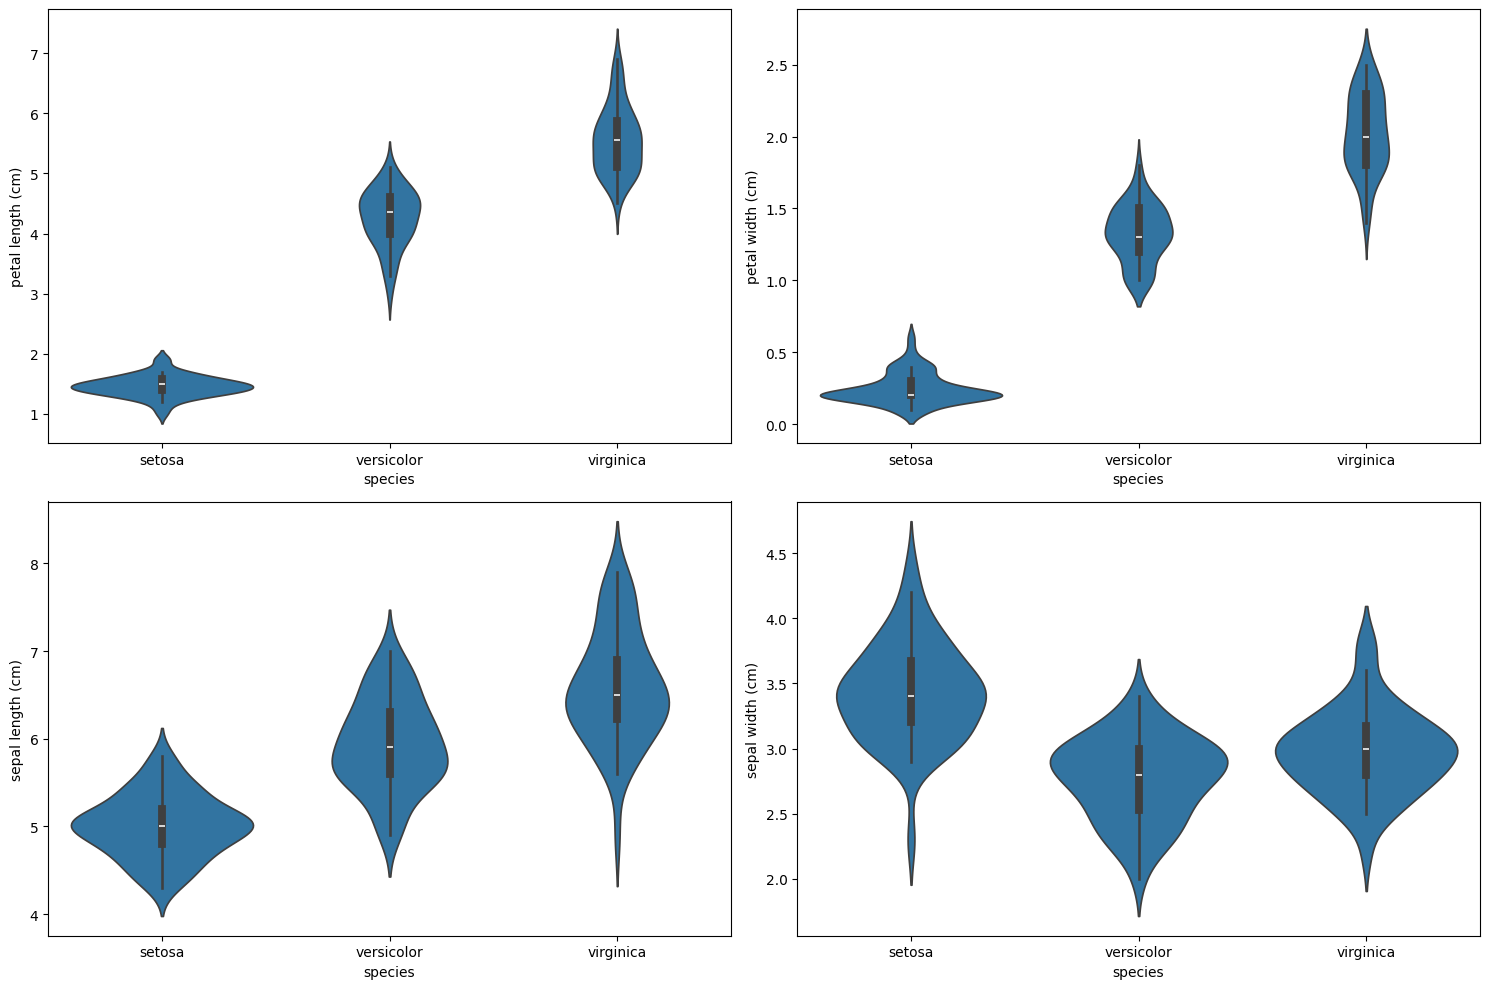

In [28]:
# Add a column with species names to df
df['species'] = iris.target_names[df['target']]

plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="petal length (cm)", data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="petal width (cm)", data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="sepal length (cm)", data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="sepal width (cm)", data=df)
plt.tight_layout()

x

Matriz de Correlação do IRIS

In [31]:
corr = df.select_dtypes(include=[float, int]).corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


**Matriz de correlacao**

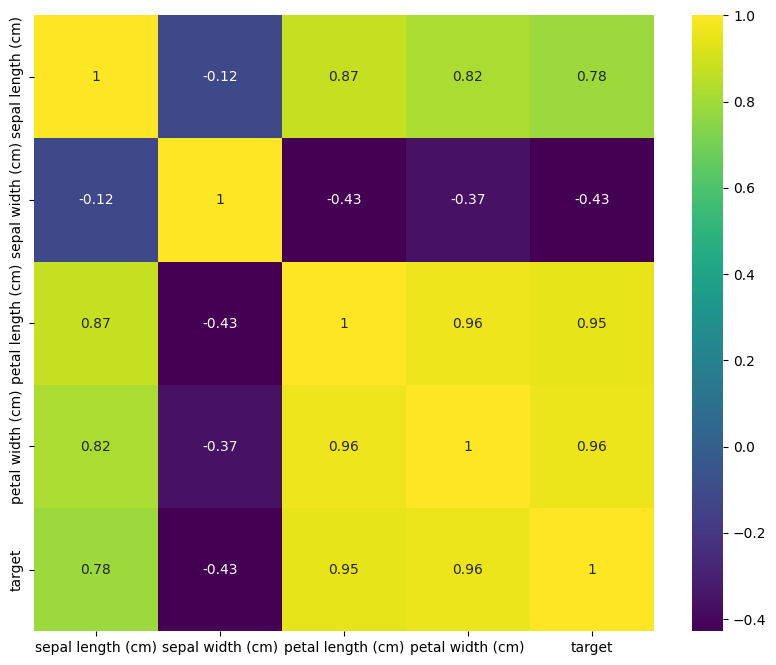

In [33]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap = "viridis", annot = True)
plt.show()